# Loading Data and Preprocessing

In [28]:
%%capture
%run "rfmvd.ipynb"

In [29]:
rfmvd_scaled = rfmvd_scaled # type: ignore

# Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Segmentation Algorithms

## K-means

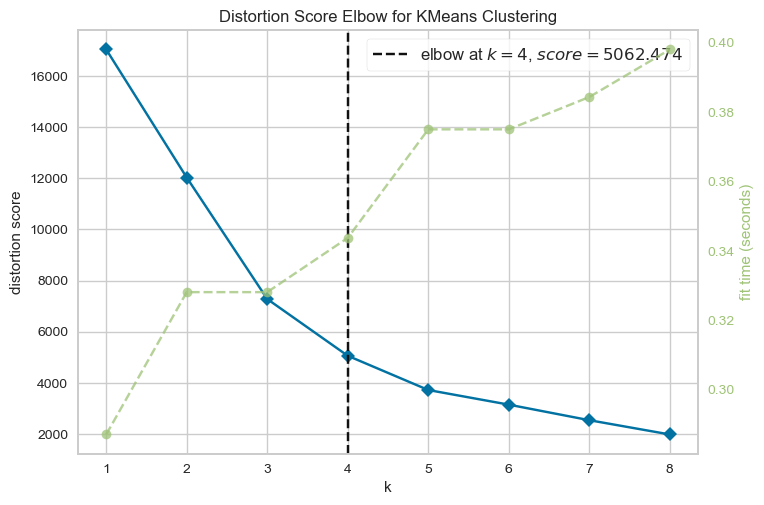

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# RFM
vars = ['Recency', 'Frequency', 'Monetary']
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,9))
visualizer.fit(rfmvd_scaled[vars]) 
visualizer.show()

In [32]:
n = 4
kmeans = KMeans(n_clusters=n, max_iter=500, random_state=1)
kmeans.fit(rfmvd_scaled[vars])

KMeans(max_iter=500, n_clusters=4, random_state=1)

In [33]:
rfmvd_scaled["Label1"] = kmeans.labels_

In [34]:
rfmvd_scaled.head(1)

,Recency,Frequency,Monetary,Variety,Duration,Label1
0,1.569937,-0.281706,-0.309073,-0.459605,0.073865,1


In [35]:
n2 = 3
for i in range(n):
    vd = rfmvd_scaled.loc[rfmvd_scaled.Label1 == i, ['Variety', 'Duration']]
    kmeans = KMeans(n_clusters=n2, max_iter=500, random_state=1)
    kmeans.fit(vd)
    rfmvd_scaled.loc[rfmvd_scaled.Label1 == i, "Label2"] = kmeans.labels_

In [36]:
rfmvd_scaled.head(1)

,Recency,Frequency,Monetary,Variety,Duration,Label1,Label2
0,1.569937,-0.281706,-0.309073,-0.459605,0.073865,1,0.0


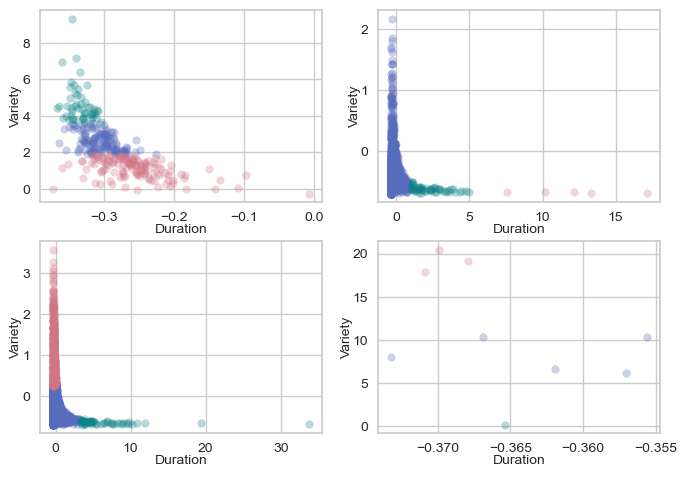

In [37]:
# DFM clustering graph
colors = ['#576CBC', '#D27685', '#0E8388']
markers = ['*', '.', '+']
fig, axs = plt.subplots(2, 2)
m = 0
for i in range(2):
    for l in range(2):
        for k in range(3):
            axs[i, l].scatter(rfmvd_scaled[(rfmvd_scaled.Label1 == m) & (rfmvd_scaled.Label2 == k)]['Duration'] , rfmvd_scaled[(rfmvd_scaled.Label1 == m) & (rfmvd_scaled.Label2 == k)]['Variety'], label = k, s=30, c=colors[k], alpha=0.3)
            axs[i, l].set_xlabel("Duration", labelpad=0, fontsize=10)
            axs[i, l].set_ylabel("Variety", labelpad=0, fontsize=10)
        m += 1
# axs.legend()
plt.show()